In [86]:
import pandas as pd
import numpy as np
train=pd.read_csv("Train.csv")
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [87]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [88]:
train['Item_Weight']=np.where(train['Item_Weight'].isnull(),np.nanmedian(train['Item_Weight']),train['Item_Weight'])
train['Item_Weight'].isnull().value_counts()

False    8523
Name: Item_Weight, dtype: int64

In [89]:
train['Outlet_Size']=np.where(train['Outlet_Size'].isnull(),train['Outlet_Size'].mode(),train['Outlet_Size'])
train['Outlet_Size'].isnull().value_counts()

False    8523
Name: Outlet_Size, dtype: int64

In [90]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [91]:
train["Item_Fat_Content"]=pd.DataFrame(np.where(train["Item_Fat_Content"]=="LF","Low Fat",train["Item_Fat_Content"]))

train["Item_Fat_Content"]=pd.DataFrame(np.where(train["Item_Fat_Content"]=="low fat","Low Fat",train["Item_Fat_Content"]))

train["Item_Fat_Content"]=pd.DataFrame(np.where(train["Item_Fat_Content"]=="reg","Regular",train["Item_Fat_Content"]))

train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [92]:
train.skew()

Item_Weight                  0.121845
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [95]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,ln
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914,6.613203
std,4.22724,0.051598,62.275067,8.371760,1706.499616,5.159782
min,4.55500,0.000000,31.290000,1985.000000,33.290000,0.000000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400,2.698948
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000,5.393093
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400,9.458529
max,21.35000,0.328391,266.888400,2009.000000,13086.964800,32.839095


In [94]:
train['ln']=train['Item_Visibility']*100

In [97]:
train['ln']=np.where(train['ln']==0,1,train['ln'])
train['ln']=np.log(train['ln'])

In [99]:
train['Item_Visibility']=train['ln']
train['Item_Visibility'].skew()
del train['ln']

In [100]:
train['Item_Visibility'].skew()

-0.3946844575221016

In [101]:
train.skew()

Item_Weight                  0.121845
Item_Visibility             -0.394684
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [102]:
train['YOB']=2019-train['Outlet_Establishment_Year']
train['YOB'].skew()

0.39664078591553986

{'whiskers': [<matplotlib.lines.Line2D at 0x1f506393ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f506393f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5063937b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5063b1908>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5063b1c50>],
 'means': []}

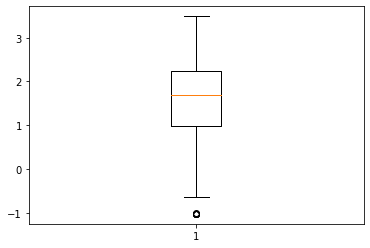

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(train['Item_Visibility'])

In [122]:
type(train['Outlet_Size'])
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,YOB
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,1.575516,140.992782,1997.831867,2181.288914,21.168133
std,4.22724,0.863444,62.275067,8.371760,1706.499616,8.371760
min,4.55500,-1.028704,31.290000,1985.000000,33.290000,10.000000
25%,9.31000,0.992862,93.826500,1987.000000,834.247400,15.000000
50%,12.60000,1.685119,143.012800,1999.000000,1794.331000,20.000000
75%,16.00000,2.246917,185.643700,2004.000000,3101.296400,32.000000
max,21.35000,3.491620,266.888400,2009.000000,13086.964800,34.000000


In [105]:
train['Outlet_Size']=pd.Categorical(train['Outlet_Size'])
df_Dummies=pd.get_dummies(train['Outlet_Size'],prefix='category')


,category_High,category_Medium,category_Small
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0
5,0,1,0
6,1,0,0
7,0,1,0
8,0,1,0
9,0,1,0


In [119]:
train1=train.copy()
train1=train1.join(df_Dummies)

In [120]:
train['Item_Fat_Content']=pd.Categorical(train['Item_Fat_Content'])
df_Dum=pd.get_dummies(train['Item_Fat_Content'],prefix='category')
train1=train1.join(df_Dum)

In [123]:
train1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,YOB,category_High,category_Medium,category_Small,category_Low Fat,category_Regular
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,1.575516,140.992782,1997.831867,2181.288914,21.168133,0.109351,0.610466,0.280183,0.647307,0.352693
std,4.22724,0.863444,62.275067,8.371760,1706.499616,8.371760,0.312098,0.487673,0.449115,0.477836,0.477836
min,4.55500,-1.028704,31.290000,1985.000000,33.290000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.31000,0.992862,93.826500,1987.000000,834.247400,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.60000,1.685119,143.012800,1999.000000,1794.331000,20.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,16.00000,2.246917,185.643700,2004.000000,3101.296400,32.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,21.35000,3.491620,266.888400,2009.000000,13086.964800,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
x=train1.drop(['Item_Identifier','Item_Fat_Content','Outlet_Size','Item_Type','Outlet_Identifier','Outlet_Location_Type'
               ,''],axis=1)

In [145]:
y=train['Item_Outlet_Sales']

In [146]:
from sklearn.linear_model import LinearRegression

LM=LinearRegression()

r=LM.fit(x,y)

preds_y=LM.predict(x)

ValueError: could not convert string to float: 'Supermarket Type1'

In [137]:
x.describe(include=['object'])

,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523
unique,16,10,3,4
top,Fruits and Vegetables,OUT027,Tier 3,Supermarket Type1
freq,1232,935,3350,5577
